# 预处理

In [2]:
import pandas as pd
path = 'ratings.csv'
pd_ratings = pd.read_csv(path)

In [37]:
path = 'reviews.csv'
data = pd.read_csv(path)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197754 entries, 0 to 3197753
Data columns (total 11 columns):
userId               int64
restId               int64
rating               float64
rating_env           float64
rating_flavor        float64
rating_service       float64
timestamp            int64
comment              object
comment_after_cut    object
length               int64
category             int64
dtypes: float64(4), int64(5), object(2)
memory usage: 268.4+ MB


In [39]:
data.head()

,userId,restId,rating,rating_env,rating_flavor,rating_service,timestamp,comment,comment_after_cut,length,category
0,0,0,2.0,3.0,3.0,2.0,1250584020000,经常去的，不过我自己的卡很久不用，被冻了，只能用爸爸的。吉利莲的巧克力以前选择多些，最近一次...,经常 卡 久 不用 冻 只能 爸爸 吉利 莲 巧克力 以前 选择 多些 最近 一次 一种 选...,40,0
1,1,0,4.0,4.0,4.0,4.0,1145639040000,"喜欢在这里购物的感觉~~不在市中心,又是凭会员卡购物,因此不会有像家乐福\沃尔马那种人多很挤...",喜欢 购物 感觉 市中心 会员卡 购物 不会 家乐福 沃尔马 那种 人多 很挤 场面 购物 ...,27,1
2,4,0,3.0,3.0,4.0,3.0,1201107000000,里面有一些进口食品还是不错的，但个人感觉商品种类比较少，而且管理不是很灵活，退货比较麻烦。价...,里面 进口 食品 不错 个人感觉 商品种类 比较 少 管理 灵活 退货 比较 麻烦 价格 方...,24,0
3,5,0,3.0,4.0,4.0,3.0,1218604860000,"虽然是有一些不方便,但购物环境比较舒服,人少,房高,感觉很通透,不像别的商场人多,楼层低,人...",方便 购物 环境 比较 舒服 人少 房高 感觉 通透 不像 商场 人多 楼层 低人 很闷 不...,25,0
4,6,0,3.0,4.0,4.0,3.0,1281275820000,非常喜欢这个德国超市，他家各类东东都品牌齐全，不像沃尔玛、家乐福之类只有便宜货。经常能找到一...,非常 喜欢 德国 超市 他家 各类 东东 品牌 齐全 不像 沃尔玛 家乐福 便宜货 经常 找...,41,0


In [40]:
data.isnull().sum()

userId                  0
restId                  0
rating                  0
rating_env              0
rating_flavor           0
rating_service          0
timestamp               0
comment                 0
comment_after_cut    2188
length                  0
category                0
dtype: int64

In [41]:
data[data['comment_after_cut'].isnull()].head()

,userId,restId,rating,rating_env,rating_flavor,rating_service,timestamp,comment,comment_after_cut,length,category
677,725,25,4.0,1.0,5.0,3.0,1273893000000,Number of visits: too many to count\nI've sear...,NaN,0,1
3417,3469,120,1.0,3.0,1.0,3.0,1258293240000,bad！\nAll the consumption need add 10% service...,NaN,0,0
4756,4987,165,1.0,0.0,0.0,0.0,1310127240000,"compaing to other parks, this one is not that ...",NaN,0,0
10580,10388,329,2.0,0.0,0.0,0.0,1283387280000,"In the city, it is occupied by, geography, and...",NaN,0,0
10596,10404,329,5.0,0.0,0.0,0.0,1301124600000,I am in Shanghai to a golf still is not easy. ...,NaN,0,1


In [10]:
pd_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422473 entries, 0 to 4422472
Data columns (total 8 columns):
userId            int64
restId            int64
rating            float64
rating_env        float64
rating_flavor     float64
rating_service    float64
timestamp         int64
comment           object
dtypes: float64(4), int64(3), object(1)
memory usage: 269.9+ MB


In [11]:
pd_ratings.isnull().values.any()

True

In [3]:
pd_ratings.isnull().sum() / pd_ratings.shape[0]

userId            0.000000
restId            0.000000
rating            0.255192
rating_env        0.078294
rating_flavor     0.074315
rating_service    0.078294
timestamp         0.000000
comment           0.071242
dtype: float64

rating  中有25%的缺失值，不能将缺失值全部dump掉

In [13]:
pd_ratings.dropna(subset=['comment'], inplace=True)

In [14]:
pd_ratings.shape

(4107409, 8)

In [15]:
pd_ratings.isnull().sum() / pd_ratings.shape[0]

userId            0.000000
restId            0.000000
rating            0.274569
rating_env        0.072427
rating_flavor     0.068646
rating_service    0.072427
timestamp         0.000000
comment           0.000000
dtype: float64

In [7]:
import jieba
import re

with open('stopwords.txt') as f2:
    stopwords = f2.read().split('\n')
    
def cut(string):
    string = ''.join(re.findall(r'[\u4e00-\u9fa5]+', string))
    words = [x for x in jieba.cut(string) if x not in stopwords]
    
    return ' '.join(words)

In [16]:
pd_ratings['comment_after_cut'] = pd_ratings['comment'].astype(str).map(cut)

In [17]:
pd_ratings['length'] = pd_ratings['comment_after_cut'].astype(str).map(lambda x : len(x.split()))

In [18]:
pd_ratings['rating_env'] = pd_ratings['rating_env'].fillna(0)
pd_ratings['rating_flavor'] = pd_ratings['rating_flavor'].fillna(0)
pd_ratings['rating_service'] = pd_ratings['rating_service'].fillna(0)

In [20]:
pd_ratings[pd_ratings['rating'].isnull()].shape

(1127768, 10)

In [36]:
pd_ratings[~pd_ratings['rating'].isnull()].to_csv('reviews.csv', index = False)

In [33]:
# for index, row in pd_ratings[pd_ratings['rating'].isnull()].iterrows():
#     pd_ratings.iloc[index, 2] = int((row[3] + row[4] + row[5])/3)
#     if index % 50000 == 0:
#         print(f"第{index}行。。。")

In [35]:
pd_ratings[['rating', 'rating_env', 'rating_flavor', 'rating_service', 'comment_after_cut','length']].to_csv('new_corpus.csv', index = False)

In [29]:
import numpy as np
pd_ratings['category'] = np.where(pd_ratings['rating'] > 3, 1, 0)

In [30]:
pd_ratings.isnull().sum()

userId                    0
restId                    0
rating               909655
rating_env                0
rating_flavor             0
rating_service            0
timestamp                 0
comment                   0
comment_after_cut         0
length                    0
category                  0
dtype: int64

In [31]:
pd_ratings['comment_after_cut'].head()

0    经常 卡 久 不用 冻 只能 爸爸 吉利 莲 巧克力 以前 选择 多些 最近 一次 一种 选...
1    喜欢 购物 感觉 市中心 会员卡 购物 不会 家乐福 沃尔马 那种 人多 很挤 场面 购物 ...
3               适合 车一族 采购 没有 袋子 纸 箱子 感觉 有点像 仓库 东西 买 更好
4    里面 进口 食品 不错 个人感觉 商品种类 比较 少 管理 灵活 退货 比较 麻烦 价格 方...
5    方便 购物 环境 比较 舒服 人少 房高 感觉 通透 不像 商场 人多 楼层 低人 很闷 不...
Name: comment_after_cut, dtype: object

In [27]:
pd_ratings.describe()

,userId,restId,rating,rating_env,rating_flavor,rating_service,timestamp,length
count,4.107409e+06,4.107409e+06,3.197754e+06,4.107409e+06,4.107409e+06,4.107409e+06,4.107409e+06,4.107409e+06
mean,1.120127e+05,1.208339e+05,3.316234e+00,2.528793e+00,2.810225e+00,2.504113e+00,1.275821e+12,4.443877e+01
std,1.200472e+05,7.037776e+04,9.860932e-01,1.127409e+00,1.185560e+00,1.127501e+00,4.334833e+10,4.431106e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.049731e+12,0.000000e+00
25%,2.174800e+04,6.079100e+04,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.250581e+12,2.100000e+01
50%,6.784500e+04,1.227630e+05,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.288877e+12,3.000000e+01
75%,1.595370e+05,1.834180e+05,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,1.309968e+12,5.000000e+01
max,5.427050e+05,2.432460e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.328681e+12,1.000000e+03


In [ ]:
pd_ratings.head()

In [ ]:
import numpy as np

ratio_train = 0.7 #训练集比例
ratio_trainval = 0.2 #验证集比例
ratio_val = 0.1 #测试集比例

np.random.shuffle(files_list) ##打乱文件列表
cnt_val = round(len(files_list) * ratio_val ,0)
cnt_trainval = round(len(files_list) * ratio_trainval ,0)
cnt_train = len(files_list) - cnt_val - cnt_trainval
print("val Sample:" + str(cnt_val))
print("trainval Sample:" + str(cnt_trainval))
print("train Sample:" + str(cnt_train))

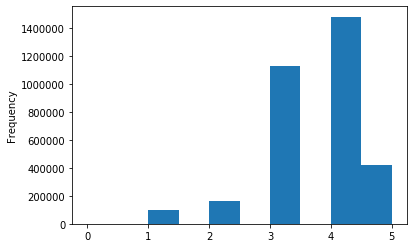

In [30]:
%matplotlib inline
pd_ratings.rating.plot(kind='hist')

In [35]:
pd_ratings.rating.value_counts()

4.0    1480733
3.0    1130759
5.0     421155
2.0     161678
1.0      99553
0.0         15
Name: rating, dtype: int64

In [36]:
pd_ratings.rating.nunique()

6

In [17]:
pd_ratings[pd_ratings.rating.isna()].shape

(1128580, 8)

rating 中有接近四分之一为空值，显然不能直接去除

In [10]:
sample = pd_ratings[:1000]

In [15]:
sample[~sample.rating.isna()].shape[0]

500

In [19]:
sample.rating.value_counts()

4.0    219
3.0    212
5.0     45
2.0     19
1.0      5
Name: rating, dtype: int64

In [22]:
sample = pd_ratings[~pd_ratings.comment.isna()]

In [23]:
sample.shape

(4107409, 8)

In [24]:
sample[sample.rating.isna()].shape

(1127768, 8)

In [25]:
sample[sample.rating.isna()&sample.rating_env.isna()&sample.rating_flavor.isna()&sample.rating_service.isna()].shape

(573, 8)